# ML Evaluation Metrics and Loss Functions

This Python notebook implements commonly used evaluation metrics and loss functions for machine learning tasks, covering both regression and classification.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Regression

- R2: r-squared
- Adjusted R2
- MSE: mean squared error
- MAE: mean absolute error
- MedAE: median absolute error
- RMSE: root mean squared error
- RMSLE: root mean squared log error
- MAPE: mean absolute percentage error

Load `california_housing` dataset to generate y_true and y_pred to apply regression metrics.

shape: (4128, 2) 
 ---------------------
     y_pred   y_true
0  1.149589  0.47700
1  1.506069  0.45800
2  1.903937  5.00001
3  2.850594  2.18600
4  2.006633  2.78000 
 ---------------------


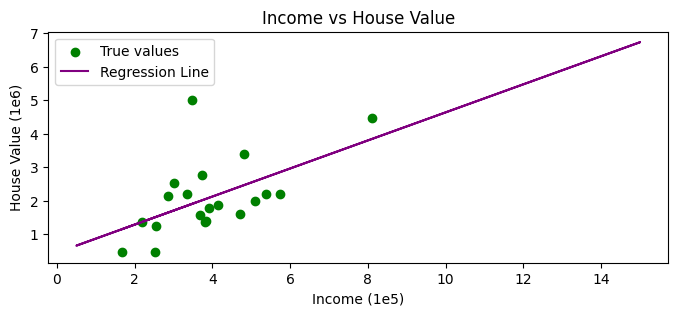

In [69]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

cal_housing = fetch_california_housing(as_frame=True)
X, y = cal_housing.data, cal_housing.target


# we will build a simple model with only 1 feature to predict house value ($'000,000)
# model feature: MedInc - median income for households ($'00,000)
X_small = X[['MedInc']]
X_train, X_test, y_train, y_test = train_test_split(X_small, y, test_size=.2, random_state=42)

# we will not do further data processing or hyperparameter tuning as that is not the aim of this notebook
# we will use the simplest regression model for this notebook - Linear Regression (supervised)
# our  objective is to learn about and implement regression metrics on our model

# get predictions
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_true = y_test

df_reg = pd.DataFrame({'y_pred': y_pred, 'y_true': y_true})
df_reg.reset_index(inplace=True)
df_reg.drop(columns=['index'], inplace=True)
print('shape:', df_reg.shape, '\n', '---------------------')
print(df_reg.head(), '\n', '---------------------')

# plot points and regression line
points_to_show = 20
plt.figure(figsize=(8,3))
plt.scatter(X_test[:points_to_show], y_test[:points_to_show], color='green', label='True values')
plt.plot(X_test, y_pred, color='purple', label='Regression Line')
plt.title('Income vs House Value')
plt.xlabel('Income (1e5)')
plt.ylabel('House Value (1e6)')
plt.legend()
plt.show()

### 1.1 R2 & Adjusted R2

- R-squared measures the proportion of the variance in the dependent variable `house value` explained by the independent variables in the model.
- It ranges from 0 to 1, where 0 means the model does not explain any variability and 1 means the model explains all the variability
- Higher R2 suggests better fit

R2 = 1 - (RSS / TSS) where:
- RSS = Unexplained variation = sum of squares of difference between y_true and y_pred
- TSS = Total variation = sum of squares of difference between y_true and y_hat (mean)

In [70]:
from sklearn.metrics import r2_score

def R2(y_true, y_pred):

    y_hat = np.mean(y_true)

    rss = np.sum((y_true - y_pred) ** 2)
    tss = np.sum((y_true - y_hat) ** 2)

    return 1 - (rss / tss)

print(R2(y_true, y_pred))
print(r2_score(y_true, y_pred))

0.45885918903846656
0.45885918903846656


The main issue with R2 is that the value does not ever decrease as we keep increasing the variables added to the regression model. This calls for adjusted R2.

Adjusted R2 penalizes extraneous variables.

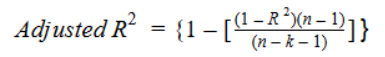

- R2 = R2 score
- n = no of observations
- p = no of features

In [72]:
def adjusted_R2(X_test, y_true, y_pred):
    r2 = R2(y_true, y_pred)
    n = y_true.shape[0]
    k = X_test.shape[1]

    return (1 - ((1-r2) * (n-1) / (n-k-1)))

adjusted_R2(X_test, y_true, y_pred)

0.4587280351821986

Adj r2 is close to r2 because we're only using 1 feature with many observations


### 1.2 MSE: mean squared error

MSE calculates the avg of squared differences between y_true and y_pred. MSE is highly sensitive (penalizes) to outliers because of squared error terms.

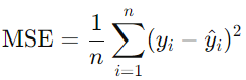

In [73]:
from sklearn.metrics import mean_squared_error

def mse(y_true, y_pred):
    n = y_true.shape[0]

    return ((np.sum((y_true - y_pred) ** 2))) / n

print(mse(y_true, y_pred))
print(mean_squared_error(y_true, y_pred))

0.7091157771765548
0.7091157771765548


### 1.3 MAE: mean absolute error

MAE calculates the avg of absolute difference between y_true and y_pred. MAE is less sensitive to outliers as compared to MSE. MAE gives equal weight to all errors, which may not be desirable in situations where larger errors or outliers should be penalized more.

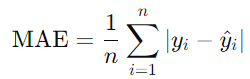

In [75]:
from sklearn.metrics import mean_absolute_error

def mae(y_true, y_pred):
    n = y_true.shape[0]

    return (1/n) * np.sum(np.abs(y_true-y_pred))

print(mae(y_true,y_pred))
print(mean_absolute_error(y_true,y_pred))

0.6299086530093759
0.6299086530093759


### 1.3 MedAE: median absolute error

MedAE is calculated as the median of the absolute differences between the actual and predicted values. It is particularly robust to outliers, making it a valuable metric in certain contexts.

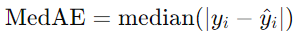

In [77]:
from sklearn.metrics import median_absolute_error

def medae(y_true, y_pred):
    return np.median(np.abs(y_true-y_pred))

print(medae(y_true, y_pred))
print(median_absolute_error(y_true, y_pred))

0.5019078390069454
0.5019078390069454


### 1.4 RMSE: root mean squared error

Square root of the average squared differences between the actual and predicted values. Penalizes larger errors more severely before averaging.

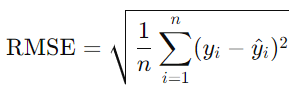

In [79]:
from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
    n = y_true.shape[0]

    return np.sqrt((1/n) * np.sum((y_true - y_pred)**2))

print(rmse(y_true,y_pred))
print((mean_squared_error(y_true,y_pred))**.5)

0.8420901241414454
0.8420901241414454


### 1.5 RMSLE: root mean squared log error

RMSLE measures the average squared logarithmic difference between the actual and predicted values. A lower RMSLE indicates better model performance.

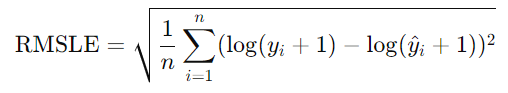

In [83]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    n=y_true.shape[0]

    return np.sqrt((1/n) * np.sum(((np.log(y_true+1)) - np.log(y_pred+1))**2))

print(rmsle(y_true,y_pred))
print(np.sqrt(mean_squared_log_error(y_true,y_pred)))

0.2620748276833723
0.2620748276833723


### 1.6 MAPE: mean absolute percentage error

MAPE represents the average absolute percentage error between the actual and predicted values. A lower MAPE indicates better model performance, and it is expressed as a percentage.

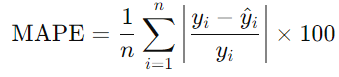

In [87]:
from sklearn.metrics import mean_absolute_percentage_error

def mape(y_true,y_pred):
    n=y_true.shape[0]

    return (1/n) * np.sum((np.abs((y_true-y_pred)/y_true))*100) / 100

print(mape(y_true,y_pred))
print(mean_absolute_percentage_error(y_true,y_pred))

0.3905583956532853
0.3905583956532853


## 2. Classification

- accuracy
- recall
- precision
- f1
- confusion matrix
- roc auc
- pr auc
- log loss
- cross entropy loss
- KL divergence
- focal loss

In [123]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# use iris data for classification
iris = load_iris()
print(iris.keys(), '\n', '------------')

df_c = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_c['target'] = iris.target

# for simplicity, we only use targets 1 and 2 for this notebook.
df_c = df_c[df_c['target'].isin([1, 2])]
print(df_c.target.value_counts())

df_c.head()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']) 
 ------------
target
1    50
2    50
Name: count, dtype: int64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


     y_pred  y_true
67        1       1
83        2       1
126       2       2
53        1       1
106       1       2


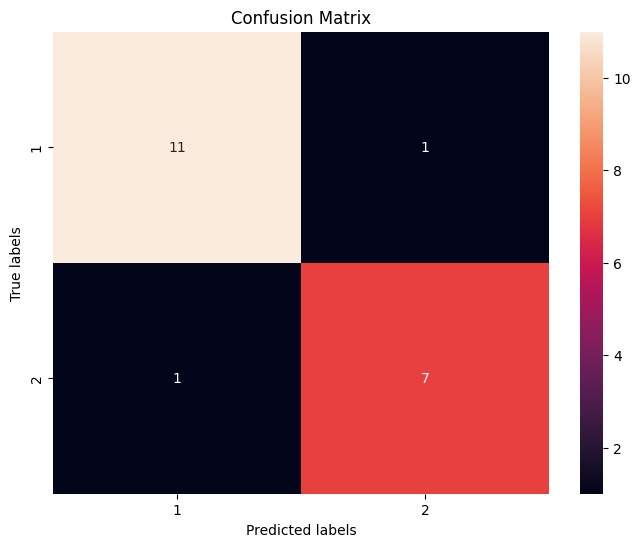

In [145]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

X = df_c.drop(columns=['target'])
y = df_c['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred=model.predict(X_test)
y_true=y_test

df = pd.DataFrame({'y_pred':y_pred, 'y_true':y_true})
print(df.head())

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

class_names = ['1', '2']
plt.xticks(ticks=[0.5, 1.5], labels=class_names)
plt.yticks(ticks=[0.5, 1.5], labels=class_names)

plt.show()

### 2.1 Accuracy, Recall, Precision, F1

In [160]:
df['tp'] = 0
df['tn'] = 0
df['fp'] = 0
df['fn'] = 0

df.loc[(df['y_true'] == 1) & (df['y_pred'] == 1), 'tp'] = 1
df.loc[(df['y_true'] == 2) & (df['y_pred'] == 2), 'tn'] = 1
df.loc[(df['y_true'] == 2) & (df['y_pred'] == 1), 'fp'] = 1
df.loc[(df['y_true'] == 1) & (df['y_pred'] == 2), 'fn'] = 1

tp = np.sum(df['tp'].values)
tn = np.sum(df['tn'].values)
fp = np.sum(df['fp'].values)
fn = np.sum(df['fn'].values)
n = y_true.shape[0]

df.head()

,y_pred,y_true,tp,tn,fp,fn
67,1,1,1,0,0,0
83,2,1,0,0,0,1
126,2,2,0,1,0,0
53,1,1,1,0,0,0
106,1,2,0,0,1,0


In [165]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# accuracy
# can be misleading when classes are imbalanced
def accuracy(tp, tn, fp, fn):
    return np.sum(tp+tn) / n

# recall
# ability to find all positive instances out of all actual positive instances
# optimize for it when minimizing false negatives is critical (eg detect disease)
def recall(tp, tn, fp, fn):
    return np.sum(tp / (tp+fn))

# precision
# ability to get all true positive predictions out of all positive predictions
# optimize for it when minimizing false positives is crucial (eg search engine results)
def precision(tp, tn, fp, fn):
    return np.sum(tp / (tp+fp))

# f1
# harmonic mean of precision and recall
# optimize for it when you want a balance between precision (results returned be relevant) and recall (all relevant results retrieved)
def f1(tp, tn, fp, fn):
    pc = precision(tp, tn, fp, fn)
    rc = recall(tp, tn, fp, fn)
    return 2 * (pc * rc) / (pc + rc)

print('accuracy:')
print(accuracy(tp,tn,fp,fn))
print(accuracy_score(y_true, y_pred), '\n')

print('recall:')
print(recall(tp,tn,fp,fn))
print(recall_score(y_true, y_pred),'\n')

print('precision:')
print(precision(tp,tn,fp,fn))
print(precision_score(y_true, y_pred),'\n')

print('f1:')
print(f1(tp,tn,fp,fn))
print(f1_score(y_true, y_pred),'\n')

accuracy:
0.9
0.9 

recall:
0.9166666666666666
0.9166666666666666 

precision:
0.9166666666666666
0.9166666666666666 

f1:
0.9166666666666666
0.9166666666666666 



### 2.2 ROC and AUC

ROC (Receiver Operating Characteristic Curve)
- The ROC curve is a graphical representation of the performance of a binary classifier system as its discrimination threshold is varied.

AUC (Area under curve)
- AUC is the area under the ROC curve. It quantifies the overall performance of a binary classification model across all possible classification thresholds.
- AUC = 1 implies perfect classifier
- AUC = 0.5 implies no better than random guessing
- if AUC < 0.5, invert the predictions

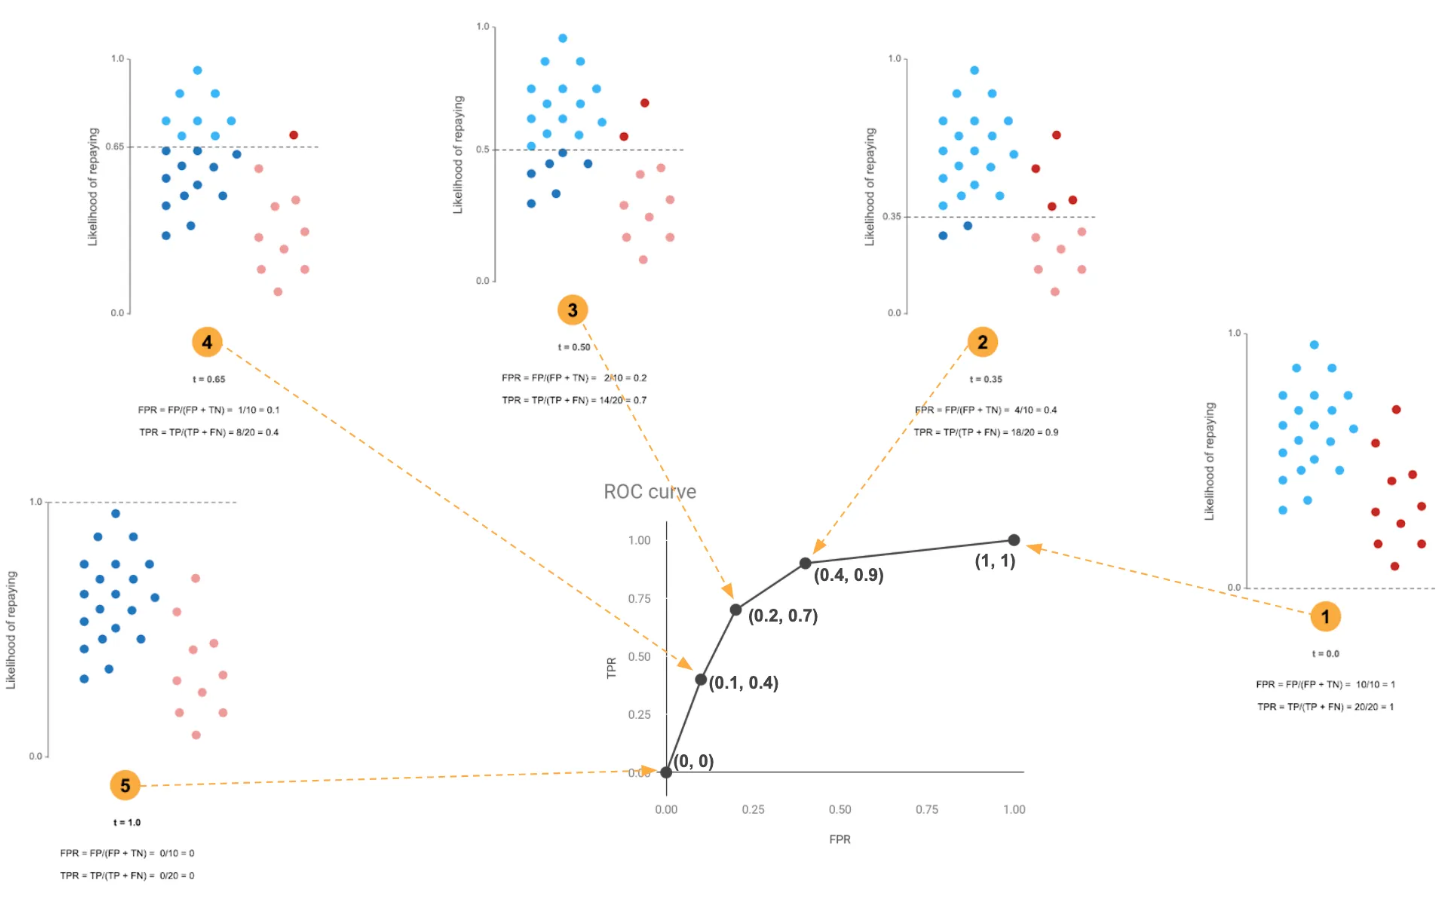
*https://towardsdatascience.com/understanding-the-roc-curve-in-three-visual-steps-795b1399481c*

Text(0, 0.5, 'True Positive Rate')

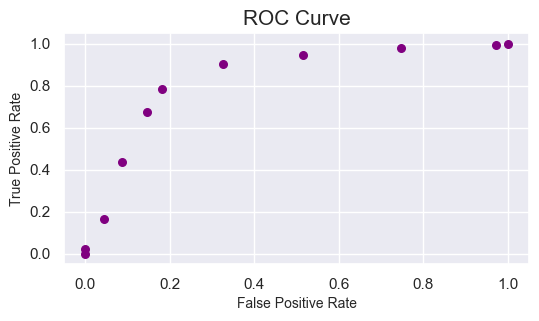

In [193]:
# ROC
y_pred_proba = model.predict_proba(X_test)[:,1]

def true_false_positive(threshold_vector, y_test):
    true_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 1)
    true_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 0)
    false_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 0)
    false_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 1)

    tpr = true_positive.sum() / (true_positive.sum() + false_negative.sum())
    fpr = false_positive.sum() / (false_positive.sum() + true_negative.sum())

    return tpr, fpr

def roc_from_scratch(probabilities, y_test, partitions=100):
    roc = np.array([])
    for i in range(partitions + 1):
        
        threshold_vector = np.greater_equal(probabilities, i / partitions).astype(int)
        tpr, fpr = true_false_positive(threshold_vector, y_test)
        roc = np.append(roc, [fpr, tpr])
        
    return roc.reshape(-1, 2)        

plt.figure(figsize=(6,3))
ROC = roc_from_scratch(y_pred_proba,y_test,partitions=10)
plt.scatter(ROC[:,0],ROC[:,1],color='purple',s=30)
plt.title('ROC Curve',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=10)
plt.ylabel('True Positive Rate',fontsize=10)

In [195]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred_proba)
auc

0.8499284308463052

AUC = 0.85 which is close to one, which suggests that the model is able to distinguish between positive and negative classes pretty well.

For practical applications, an AUC value of 0.85 indicates that if you randomly select a positive instance and a negative instance, the probability that the model will assign a higher predicted probability to the positive instance than to the negative instance is 85%. This illustrates the model’s ability to correctly rank instances according to their predicted probabilities.
